The offset of the gaussian baseline is:


<IPython.core.display.Math object>

The center of the gaussian fit is


<IPython.core.display.Math object>

The sigma of the gaussian fit is


<IPython.core.display.Math object>

The maximum intensity of the gaussian fit is


<IPython.core.display.Math object>

The Amplitude of the gaussian fit is


<IPython.core.display.Math object>

The FWHM of the gaussian fit is


<IPython.core.display.Math object>

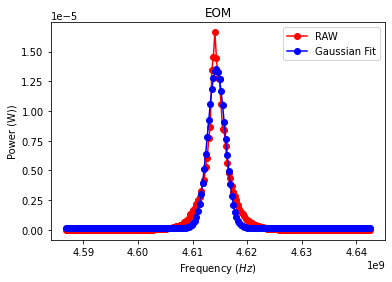

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
import pandas as pd
from IPython.display import display, Math

# Importing Data
df_1 = pd.read_csv('Rf_data_vco.csv')


fig = plt.figure()
ax1 = fig.add_subplot(111)

X = np.array(df_1["Frequency [Hz]"])
Y = np.array(df_1["Magnitude [W]"])

# print(X, Y)

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt


H, A, x0, sigma = gauss_fit(X, Y)
FWHM = 2.35482 * sigma

def latex_float(f):
    float_str = "{0:.4g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str

print('The offset of the gaussian baseline is:') 
display(Math(latex_float(H)))
print('The center of the gaussian fit is')
display(Math(latex_float(x0)))
print('The sigma of the gaussian fit is')
display(Math(latex_float(sigma)))
print('The maximum intensity of the gaussian fit is')
display(Math(latex_float(H + A)))
print('The Amplitude of the gaussian fit is')
display(Math(latex_float(A)))
print('The FWHM of the gaussian fit is')
display(Math(latex_float(FWHM)))

Z = gauss(X, H, A, x0, sigma)



ax1.plot(X,Y, "r-o", label="RAW")
ax1.plot(X, Z, "b-o", label="Gaussian Fit")
ax1.set_xlabel(r"Frequency $(Hz)$")
ax1.set_ylabel("Power (W))")
ax1.set_title("EOM")
ax1.legend()
plt.show()

# plt.savefig('books_read.png', bbox_inches="tight",
#             pad_inches=0.3, dpi=300)

# fwhm = 2*sqrt(2*log(2))*popt[3]

# print("FWHM =",fwhm)

# print(popt)

In [23]:
# [-68.34980802  47.59075111 178.16188001  -7.67131862] Full
# H              A           x_0           \sigma
# [-59.9868924   41.68140622 178.16500731   6.12862565] Just the centeral peak
